## Importing Libraries

We basic libraries and modules for our simulation

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter as SGfilter
from IPython.display import clear_output
import datetime
import joblib
from tqdm import tqdm

import const
import utilities as ut
import mockSQLenv_low_reward as SQLenv
import agent2 as agn

## Setting up the model

We set up our environment.

In [2]:
env = SQLenv.mockSQLenv(verbose=True)

Game setup with a random query


We instantiate an agent and look at its starting Q-table.

In [3]:
agt = agn.Agent(const.actions)
agt.set_learning_options(exploration=0.02, 
                         learningrate=0.1, 
                         discount=0.9, max_step = 1000)
print(agt.Q)
print(agt.total_successes, "/", agt.total_trials)

{(): array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])}
0 / 0


## Running the model

We run an agent on our environment.

In [4]:
agt.reset(env)
agt.run_episode()

Game reset (but not reinitialized with a new random query!)
Game reset
I received action 0: " and "1"="1
Correct exploratory action for the escape. I return 1
Server response is 1
I received action 0: " and "1"="1
Correct exploratory action for the escape. I return 1
Server response is 1
I received action 1: " and "1"="2
Correct exploratory action for the escape. I return 2
Server response is 2
I received action 0: " and "1"="1
Correct exploratory action for the escape. I return 1
Server response is 1
I received action 1: " and "1"="2
Correct exploratory action for the escape. I return 2
Server response is 2
I received action 2: " union select 1#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 0: " and "1"="1
Correct exploratory action for the escape. I return 1
Server response is 1
I received action 1: " and "1"="2
Correct exploratory action for the escape. I return 2
Server response is 2
I received action 2: " uni

True

We then take a look at some statistics of the agent: its Q-table, the number of its entries, the number of steps taken, and the amount of reward.

In [5]:
agt.Q

{(): array([0.89, 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
        1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
        1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
        1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
        1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ]),
 (0,): array([0.89, 0.89, 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
        1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
        1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
        1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
        1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ]),
 (-1,
  0): array([0.89, 0.89, 0.89, 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
        1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
        1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
        1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,

In [6]:
print(ut.getdictshape(agt.Q))

(19, (51,))


In [7]:
print(agt.steps)

147


In [8]:
print(agt.rewards)

-136


## Training the agent

We train the agent over $10^4$ episodes.

In [9]:
nepisodes = 10**4

agt = agn.Agent(const.actions,verbose=False)
agt.set_learning_options(exploration=0.02, 
                         learningrate=0.1, 
                         discount=0.9, max_step = 1000)

steps = []; rewards = []; states = []
for _ in tqdm(range(nepisodes)):
    env = SQLenv.mockSQLenv(verbose=False)
    
    agt.reset(env)
    agt.run_episode()
    
    steps.append(agt.steps)
    rewards.append(agt.rewards)
    states.append(ut.getdictshape(agt.Q)[0])    

100%|██████████| 10000/10000 [01:31<00:00, 109.75it/s]


We save its Q-matrix.

In [10]:
timestamp = datetime.datetime.now().strftime("%Y%m%d%H%M%S%f")
joblib.dump(agt.Q,'ignore_simul1_'+timestamp+'.pkl')

['ignore_simul1_20201203124000550845.pkl']

## Analyzing the agent

We plot the variation in the number of states in the Q-matrix

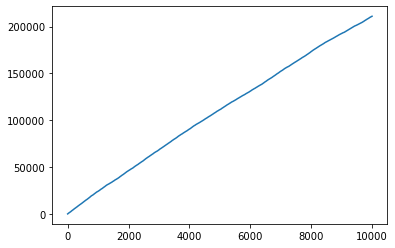

In [11]:
plt.plot(states)

We plot the number of steps per episode (averaged over 100 consecutive episodes and smoothing)

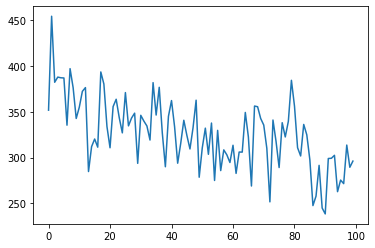

In [12]:
plt.plot(np.mean(np.array(steps).reshape(-1,100),axis=1))

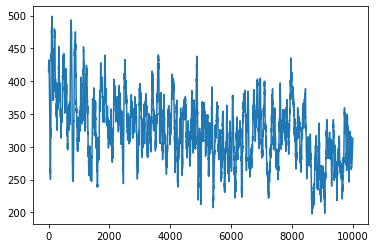

In [16]:
plt.plot(SGfilter(steps,101,3))

We plot the amount of reward per episode (averaged over 100 consecutive episodes)

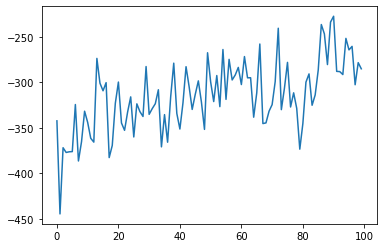

In [17]:
plt.plot(np.mean(np.array(rewards).reshape(-1,100),axis=1))